In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D  # To create Convolutional layer
from keras.layers.convolutional import MaxPooling2D  # To create Pooling layer
from keras.layers import Dropout
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


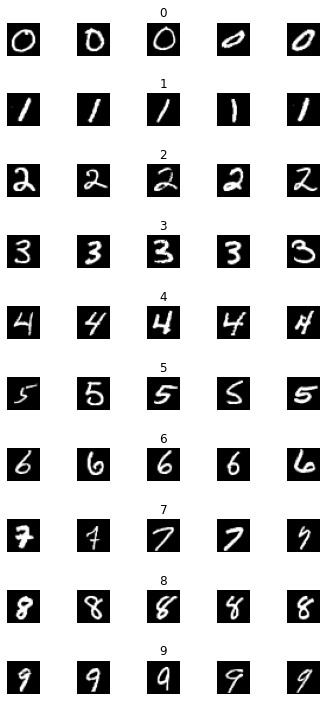

In [4]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


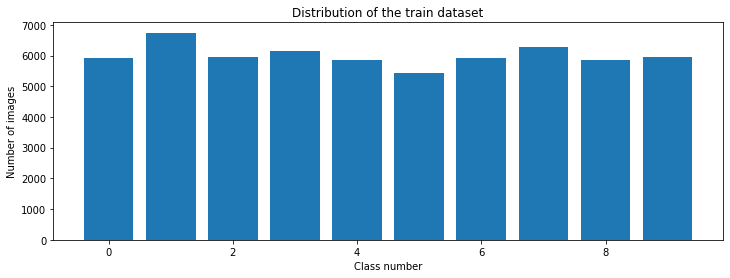

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

So far the code was similar to previous code, except one difference in reshaping the data to be used in CNN. Previously we have flatten all the images into simple 784 pixels like:

```
X_train = X_train.reshape(60000, 784)
```

However, now we leave it as 28 by 28 pixels image, and also add the depth of 1:

```
X_train = X_train.reshape(60000, 28, 28, 1)
```

Because in the regular neural network the image has to be flattened into a 1D array of pixel intensities, which where then processed as the input to neural network. With CNN, it's a little bit different.

In CNN, the first step is to add *depth* to our data. Because CNN works with applying a filter to the channels of the image that are being viewed. In the case of grayscale images, there is 1 channel present. Therefore, our data must reflect the presence of its depth.

Instructor: Rayan Slim - rslim087@gmail.com

Designing the CNN to be able to use it.

There are many prebuilt architecture that they've been already designed, which perform effectively and efficiently, and have been gradually improved overtime.

The very first revolutionary convolutational architecture was desinged in 1998 and is referred as **LeNet model** and was designed to be able to recognize handwritten numbers on checks. Later on, many other models has been researched and produced such as **AlexNet**, **ZFNet** or even **GoogleNet**.

Here we will design a *LeNet*-based model to classify our *MNIST* data set.

The *LeNet* architecture typically consist of the following structure, which is similar to what we have seen before.
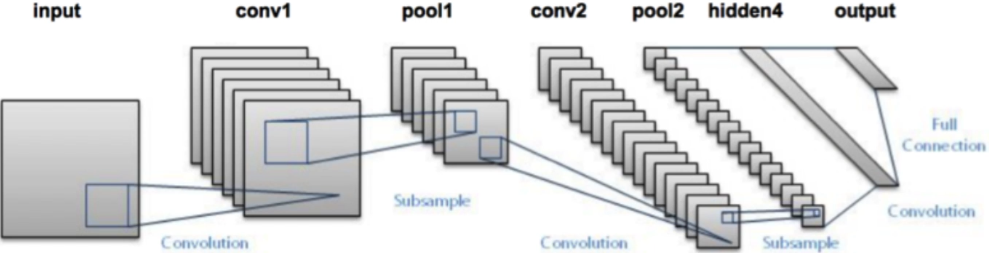

In [8]:
# Define the LeNet_model function
def leNet_model():
    model = Sequential() # Defining model using Sequential function
    
    # Adding layers to our network
    # Adding convolutional layer
    # Instead of a dense layer, we add a convolutional layer
    # First argument of Conv2D function is the number of filters in our layer,
    # which can be played around to find a suitable value for that. Here and for
    # MNIST dataset, 30 is a good value based on experience.
    # (5, 5) is the size of our filter which is a hyperparameter that can be
    # adjusted for best performance. This means that our filter is 5x5 matrix.
    # We need to specify the shape of our inputted data as this is the first
    # layer of our network. --> input_shape = (28, 28, 1) meaning that our input
    # layer will take in an image of size 28x28 with the depth of 1
    # Having this layer, our 28x28 image will be reduced down to 30 feature maps,
    # each one 24x24. Therefore, the full output of our convolutional layer will
    # have feature maps of a depth of 30 as each independent filter used on the
    # original image adds depth to the convoluted image.
    # Analyzing the structure of this layer, we can determine the amount of
    # adjustable parameters that it contains. Considering that each filter is
    # 5x5, and each pixel inside filter has its own value, a single filter will
    # have 25 values or adjustable parameters. Considering that we have 30
    # filters, we will have 30*25=750. Finally considering that each filter has
    # its own respective bias value, which is considered a parameter, we get a
    # total of 750+30=780 adjustable parameters in this layer.
    # This convolutional 2D layer can take in some other arguments to customize
    # the layer. Arguments like 'strides' and 'padding'.
    # Stride is simply the kernel step when convolved on the image. How much the
    # kernel is translated. This is important because the smaller the stride,
    # the more the kernel convolutional operations, and thus the more output
    # that's retained.
    # Padding? When coductin convolutions the spatial size of the image gets
    # smaller, as we lose the information at the borders even if we used a
    # stride of 1. So, padding is used to preserve the spatial dimensionality of
    # the image.
    # We have half-padding or oftern denoted as same-padding that ensures that
    # the output size remains the same as the input size. For that we add some
    # pixel thick layer of padding, each one with a value of 0. Convolving the
    # kernel, even the information at the borders are processed. That's
    # outputting an image with same dimensionality.
    # Preserving the spatial dimensionality in most cases is quite a desirable
    # property. For instance it allows to extract low-level features, and thus
    # by keeping all the information at the border, this tends to improve the
    # performance.
    # Padding argument can be either 'valid', 'casual' or 'same'. If we don't
    # provide this argument, the 'valid' will be considered which means no
    # padding is considered. We don't use it as MNIST dataset, consists of
    # centered hand-written letters, we don't need to use padding because we are
    # not interested in the outer edges of our image. They don't contain any
    # siginificant information.
    # Similarly with the stride length argument. By not including it, the
    # default value of 1 will be considered.
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))

    # Adding the pooling layer
    # pool_size=(2,2) is the size of the pooling element. Therefore, grabbing
    # the max value in a feature map within a 2x2 neighborhood. The pooling size
    # is appropriate as it is not too large to miss relevant feature in the
    # convoluted image, and large enough to help classify our image in a more
    # efficient way.
    # After the pooling process, the shape of our convoluted image is going to
    # go from a 24x24x30 to a smaller shape of 12x12x30
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # As we move through the network, the size of our images decreases and
    # starts to gain depth. In our case, gaining a depth of 30.
    # This depth contains features extracted from the original image from each
    # of the filters and is very valuable.

    # Here we use less filter as we have more depth to reduce the required
    # computational power. 30 --> 15
    # As our image is smaller this time, we use a smaller filter: (5,5)-->(3,3)
    # However, as the depth of previous pooling layer was higher, we are going
    # to deal with higher amount of data which is:
    # 15(filters)*30(images)*(3*3)(size of filter)+15(bias) = 4065 parameters
    # Here we don't need to define our input_shape as it is not our first layer
    # The output of this layer is a 10x10 image but with the depth of 15
    model.add(Conv2D(15, (3, 3), activation='relu'))

    # The result output of this pooling process will be a 5x5 image with a depth
    # of 15. However, the pooling has kept the most relevant parts of the
    # features that we extracted.
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening our data to format it properly for to go into the fully
    # connected network.
    # This layer will take our input data of shape 5x5x15 and reshape it to 1D
    # array of shape 375
    model.add(Flatten())

    # 500 = Amount of nodes in the first hidden layer (an arbitrary value)
    model.add(Dense(500, activation='relu'))

    # Output layer of our network
    # As this is the upper layer, the number of nodes will be defined to be
    # equal to number of classes
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [9]:
model = leNet_model()
print(model.summary())  # A summary of shape and number of parameters in each layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 44s 11ms/step - loss: 0.5315 - accuracy: 0.8328 - val_loss: 0.0511 - val_accuracy: 0.9842
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0491 - accuracy: 0.9841 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0453 - val_accuracy: 0.9870
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0395 - val_accuracy: 0.9902
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0439 - val_accuracy: 0.9892
Epoc

Text(0.5, 0, 'epoch')

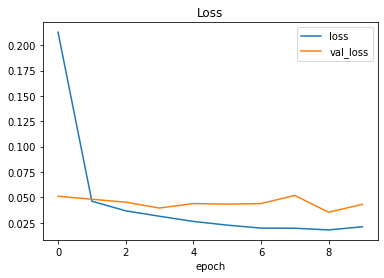

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

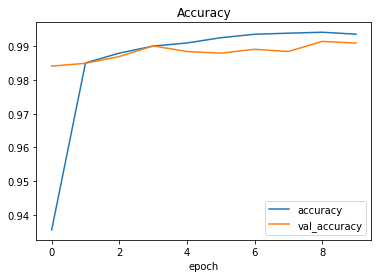

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

If we compare this convolutional network with the previous deep network, we see that it's performing better, and has very smaller losses (comparing Loss graphs).

Also the accuracy (comparing accuracy graphs) is much higher, 99% vs 94%. Also it can be seen that the difference in accuracy between the training and validation set is relatively low.

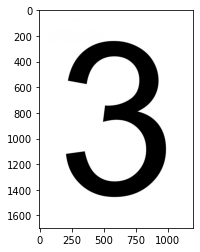

In [13]:
import requests
from PIL import Image

url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

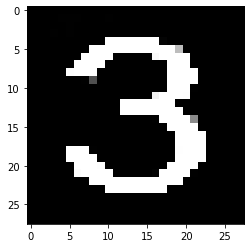

In [14]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [15]:
# Reshaping the image to have the same dimension as the inputs, except it is not
# flatten at 784 pixels as previous deep network, as we passed here the image
# into our neural network as 28x28x1
img = img/255
img = img.reshape(1, 28, 28, 1)

In [16]:
prediction = model.predict_classes(img)
print("Predicted digitL ", str(prediction))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted digitL  [3]


In [18]:
# Evaluation of the model based on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

<class 'list'>
Test score:  0.051473040133714676
Test accuracy:  0.9876000285148621


As we have already seen, the CNN performs much better than the previous deep neural network. However, we still can see some level of overfitting (?), which is reasonable since we have used 500 nodes, but generally we are aware that whenever the validation error is higher than the training error often time that would mark the beginnings of our model starting to overfit.

So, as effective as this convolutional layer was in classifying test images, on top of that we are going to introduce another quick technique to reduce overfitting our data.

We do that in the LeNet model function by adding a specific layer type that will help reduce overfitting of our data. This layer type is called the ***dropout*** layer. It essentially functions by *randomly* setting a predefined fraction rate of input nodes to 0 at each update during training which helps prevent overfitting.

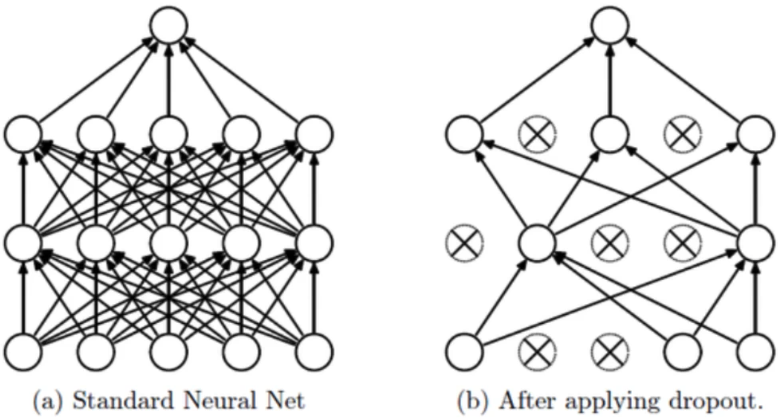

As it can be seen, some nodes have been turned off and are no longer communicating information along the network.

It is important to denote that although in the image only one set of nodes are turned off, this will be changed with the next update and with each update a random set of nodes will be turned off. Only the fraction is predefined and constant. This process works to prevent overfitting because it forces the neural network to use various combinations of nodes to classify the same data.

As with each update a random set of nodes survives the dropout process each node is forced to learn the dataset in the more independent way with a unique neural arrangement each time. This causes a neural network in general to become more versatile and allows the weights to be more uniformly distributed along the network. This only occurs during training.

When this network is used on new data, test data for example, dropout is not used and all nodes are used to classify the new data. When dropout is no longer used, the nodes can combine all of their independent learning to form a more effective neural network. Here and in this example for the purpose of demonstration we only add 1 dropout layer, but we can have as many dropout layers as possible to get better performance. Their location can also vary; they can be placed between the convolutional layer or between our fully connected layers.

Typically the dropout layer is used in between the layers that have a high number of parameters because these high parameter layers are more likely to overfit and memorize the training data. For this reason we attempt to place our dropout layer between our two fully connected layers to fix our overfitting problem.